In [76]:
import pandas as pd
from math import log
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
%matplotlib inline

## Loading the dataframes

Fill dict `df_dict` with dataframes with keys: *book_name*, e.g. *aubonheurdesdames_gender_nosolo*

In [77]:
books = ['aubonheurdesdames', 'candide', 'lassommoir', 'letourdumondeen80jours', 'madamebovary']
gender_names = ['gender_nosolo', 'gender_solo']
job_names = ['count_full_const', 'count_full_decr', 'count_expo_const', 'count_expo_decr', 
              'proximity_full_const', 'proximity_full_decr', 'proximity_expo_const', 'proximity_expo_decr']
frame_names = job_names + gender_names
suffix = '.csv'
path = 'metadata/'
pred_col = ['count', 'proximity']


df_dict = {}
for b in books:
    for name in frame_names:
        file = path + b + '_' + name + suffix 
        key = b + '_' + name
        df_dict[key] = pd.read_csv(file)
        df_dict[key].drop('Unnamed: 0', axis=1, inplace=True)
        
        predictor = name.split('_')[0]
        if predictor in pred_col:
            df_dict[key]['Predictor'] = predictor
        

In [78]:
gender_cols = df_dict['aubonheurdesdames_gender_nosolo'].columns

In [79]:
df_dict['aubonheurdesdames_gender_nosolo']

,Character,Label,Title_score,Title_score_div,Title_in_name,Adj_score,Adj_score_div,Pron_score,Pron_score_div,Mention_count,Book_length,Span,Interaction_count,Char_count
0,Denise,f,1.0,0.001957,0.0,81.0,0.158513,153.0,0.299413,511.0,8685.0,6136.0,142.0,58.0
1,Mouret,m,-9.0,-0.024390,0.0,-21.0,-0.056911,-156.0,-0.422764,369.0,8685.0,2052.0,105.0,58.0
2,Hutin,m,-2.0,-0.016129,0.0,-3.0,-0.024194,-3.0,-0.024194,124.0,8685.0,509.0,51.0,58.0
3,Bourdoncle,m,0.0,0.000000,0.0,-3.0,-0.025641,6.0,0.051282,117.0,8685.0,5126.0,52.0,58.0
4,MmeDesforges,f,0.0,0.000000,102.0,-3.0,-0.029412,-9.0,-0.088235,102.0,8685.0,4.0,46.0,58.0
5,Baudu,f,-1.0,-0.010638,0.0,0.0,0.000000,3.0,0.031915,94.0,8685.0,5132.0,26.0,58.0
6,MmeAurélie,f,0.0,0.000000,93.0,0.0,0.000000,-6.0,-0.064516,93.0,8685.0,2055.0,39.0,58.0
7,Pauline,f,0.0,0.000000,0.0,0.0,0.000000,6.0,0.068182,88.0,8685.0,3551.0,32.0,58.0
8,Favier,m,-1.0,-0.011628,0.0,3.0,0.034884,-6.0,-0.069767,86.0,8685.0,2051.0,37.0,58.0
9,Robineau,m,0.0,0.000000,0.0,-3.0,-0.035294,3.0,0.035294,85.0,8685.0,4327.0,30.0,58.0


In [80]:
palette = sns.color_palette()
sns.set_style('whitegrid')

## Job predictor choice
How to choose predictor
- highest rank predictions score higher than high rnak predictions of other predictors?

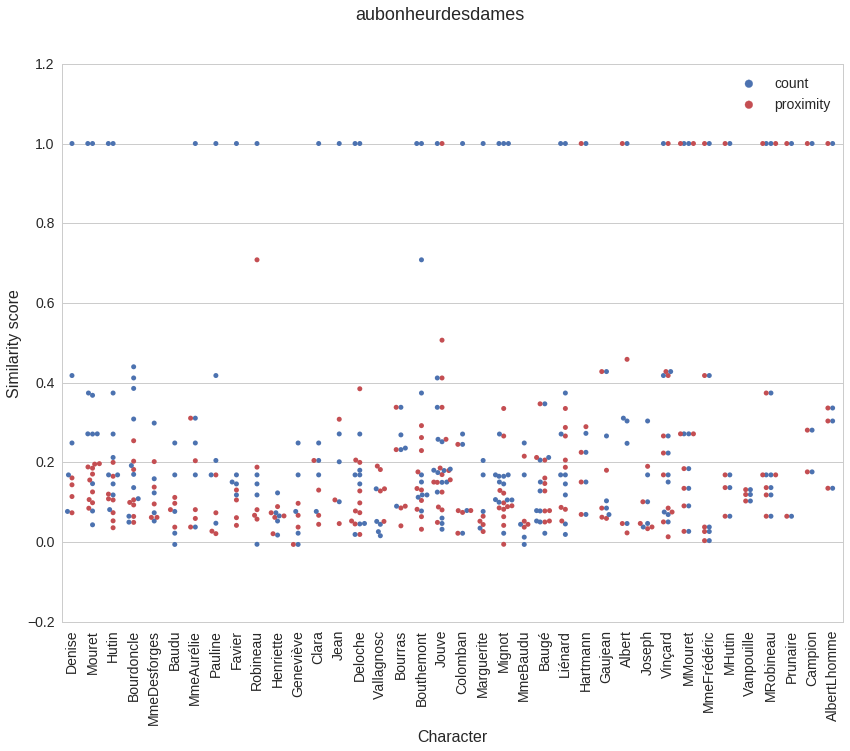

In [81]:
book = 'aubonheurdesdames'
name1 = book + '_count_full_const'
name2 = book + '_proximity_full_const'

plotter = df_dict[name1].append(df_dict[name2])
fig, ax = plt.subplots(figsize=(14,10))

sns.swarmplot(
    x='Character',
    y='Similarity',
    hue='Predictor',
    palette={'count': palette[0], 'proximity': palette[2]},
    data=plotter,
    ax=ax)
plt.xticks(rotation=90)
plt.suptitle(book, fontsize=18)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.show()

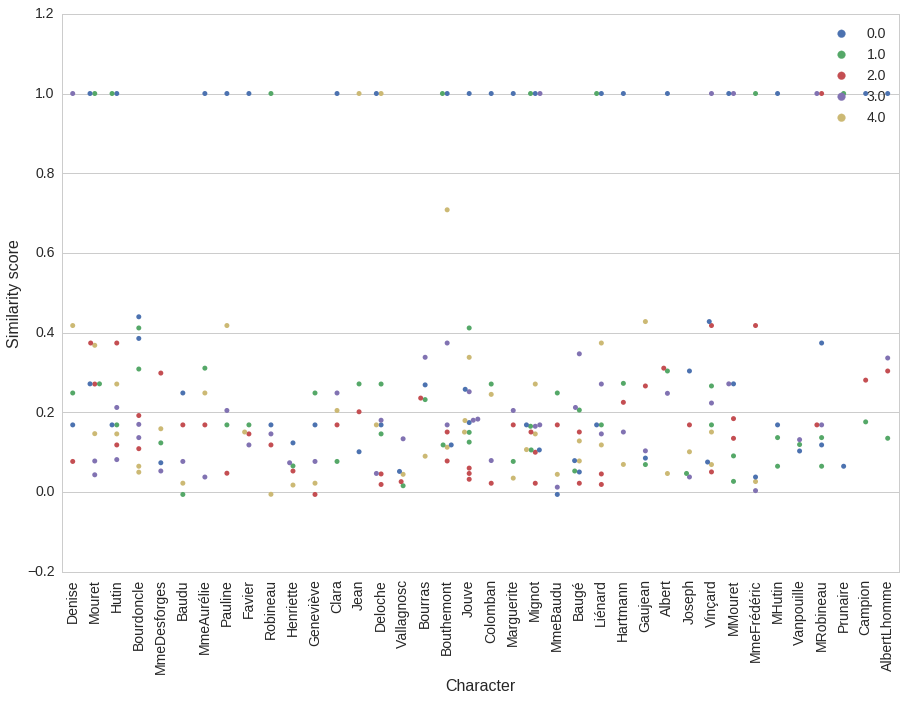

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
book = 'aubonheurdesdames'
name = book + '_count_full_const'
sns.swarmplot(
    x='Character',
    y='Similarity',
    data=df_dict[name],
    hue='Rank',
    ax=ax)
ax.legend(
   loc='best',
   fontsize=14)
ax.tick_params(labelsize=14)
plt.xlabel('Character', fontsize=16)
plt.ylabel('Similarity score', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [93]:
df_gender = pd.DataFrame(columns=gender_cols)
for book in books:
    for name in gender_names:
        df_key = book + '_' + name
        df_gender = df_gender.append(df_dict[df_key])
        
y = df_gender.Label
df_gender.drop('Label', axis=1, inplace=True)
y = y.apply(lambda x: 0 if x == 'f' else 1 ) 
df_gender.drop('Character', axis=1, inplace=True)

In [94]:
scaler = StandardScaler()

df_gender = scaler.fit_transform(df_gender)

In [95]:
lr_cv = LogisticRegression(max_iter=3000)

model = lr_cv.fit(df_gender, y)
model.coef_

array([[-0.08193814, -1.41146612, -2.82482818, -0.9937712 , -0.17165636,
         0.46001042, -0.42715776, -0.13527358, -0.6821248 ,  0.18059931,
         0.06665751, -0.14493453]])

In [102]:
df_joined_gend_preds = {}
for book in books:
    df_joined_gend_preds[book] = df_dict[book + '_' + gender_names[0]].join(
                    df_dict[book + '_' + gender_names[1]], lsuffix='_nosolo', rsuffix='_solo')
    
df_append_gender = pd.DataFrame(columns=df_joined_gend_preds['candide'].columns)
for k, v in df_joined_gend_preds.items():
    df_append_gender = df_append_gender.append(v)
        
y = df_append_gender.Label_nosolo 
df_append_gender.drop(['Label_nosolo', 'Label_solo'], axis=1, inplace=True)
df_append_gender.drop(['Character_nosolo', 'Character_solo'], axis=1, inplace=True)

y = y.apply(lambda x: 0 if x == 'f' else 1 ) 
 

In [103]:
df_append_gender.columns

Index(['Title_score_nosolo', 'Title_score_div_nosolo', 'Title_in_name_nosolo',
       'Adj_score_nosolo', 'Adj_score_div_nosolo', 'Pron_score_nosolo',
       'Pron_score_div_nosolo', 'Mention_count_nosolo', 'Book_length_nosolo',
       'Span_nosolo', 'Interaction_count_nosolo', 'Char_count_nosolo',
       'Title_score_solo', 'Title_score_div_solo', 'Title_in_name_solo',
       'Adj_score_solo', 'Adj_score_div_solo', 'Pron_score_solo',
       'Pron_score_div_solo', 'Mention_count_solo', 'Book_length_solo',
       'Span_solo', 'Interaction_count_solo', 'Char_count_solo'],
      dtype='object')

In [104]:
df_append_gender = scaler.fit_transform(df_append_gender)

In [105]:
model = lr_cv.fit(df_append_gender, y)
model.coef_

array([[-1.11174491, -0.31418785, -2.39576606, -0.29182404, -0.06455412,
         0.66696488, -0.86830531,  0.00822791, -0.33786407,  0.31431662,
         0.01223736, -0.13106788,  0.99240275, -1.3742836 , -1.9649746 ,
        -1.211337  , -0.3069386 ,  0.42342515, -0.16788551,  0.0289296 ,
        -0.33786407,  0.09797571,  0.01223736, -0.13106788]])